# **`Customer Churn Prediction Challenge For Azubian`**

# **`Business Understanding`**

This challenge is for an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

**Evaluation**  
The evaluation metric for this challenge is Area Under the Curve (AUC).

The values can be between 0 and 1, inclusive. Where 1 indicates the customer churned and 0 indicates the customer stayed with Expresso.  

This project follows the CRISP-DM framework.

### Analytical Questions
1. How does tenure relate to churning
2. From which region do most churners come from
3. Which are most preffered top packs
4. How does income relate to churning
5. What is the overall Churn-rate

### Hypothesis
**Null Hypotheis** The number of times a client is active for 90days does not influence churning  
**Alternative Hypotheis** The number of times a client is active for 90days does influence churning



# **`Data Understanding`**

| Variable         | Description                                       |
|------------------|---------------------------------------------------|
| user_id          | Unique identifier for each client                 |
| REGION           | The location of each client                       |
| TENURE           | Duration in the network                           |
| MONTANT          | Top-up amount                                     |
| FREQUENCE_RECH   | Number of times the customer refilled             |
| REVENUE          | Monthly income of each client                     |
| ARPU_SEGMENT     | Income over 90 days / 3                           |
| FREQUENCE        | Number of times the client has made an income     |
| DATA_VOLUME      | Number of connections                            |
| ON_NET           | Inter expresso call                               |
| ORANGE           | Call to orange                                    |
| TIGO             | Call to Tigo                                      |
| ZONE1            | Call to zones1                                    |
| ZONE2            | Call to zones2                                    |
| MRG              | A client who is going                             |
| REGULARITY       | Number of times the client is active for 90 days |
| TOP_PACK         | The most active packs                             |
| FREQ_TOP_PACK    | Number of times the client has activated the top pack packages |
| CHURN            | Variable to predict - Target                      |

## **Loading Datasets**

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data train data
df = pd.read_csv('..\Data/Train.csv')

df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [3]:
# Load test data
test_data = pd.read_csv('..\Data\Test.csv')

test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


## **Exploratory Data Analysis (EDA)**

In [4]:
# Number of rows and columns
print(f"The dataset has {df.shape[0]} Rows and {df.shape[1]} Columns")

The dataset has 1077024 Rows and 19 Columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [6]:
# Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


In [7]:
# Data Description (Categorical data)
df.describe(include='O').T

,count,unique,top,freq
user_id,1077024,1077024,14808bdaa321d073ca9ac3bc33385d63cb84de7d,1
REGION,652687,14,DAKAR,256259
TENURE,1077024,8,K > 24 month,1021853
MRG,1077024,1,NO,1077024
TOP_PACK,626129,126,All-net 500F=2000F;5d,158779


In [8]:
# Check null values
df.isna().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [9]:
# Check percentage of the missing data per colum
round(df.isnull().sum() / len(df) * 100, 2)

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

In [10]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

## **Notes**
- The dataset has 1077024 Rows and 19 Columns
- Only five of the 19 columns that do not have null values. One of the 5 columns is the target column (Churn column)
- Columns with the  most missing data in percentage include Call to ZONE2 (93.61%), Calls to ZONE1 (92.12%) and Calls to TIGO (59.87%). The rest columns that contain missing data rage from 30 - 49 (%) in missing data
- No duplicates in the dataset

## **Univariate Analysis**

In [11]:
# Get unique values for every categorical column
for col in df.columns:
    if col not in df.select_dtypes(include=['float', 'number']) and col != 'user_id':
        print('=' * 100)
        print(col)
        print('x' * 100)
        print(df[col].unique())

REGION
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']
TENURE
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']
MRG
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['NO']
TOP_PACK
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
['On net 200F=Unlimited _call24H' nan 'Data:490F=1GB,7d'
 'All-net 500F=2000F;5d' 'On-net 500=4000,10d' 'Data:3000F=10GB,30d'
 'Data:200F=Unlimited,24H' 'IVR Echat_Daily_50F' 'Data:1000F=2GB,30d'
 'Mixt 250F=Unlimited_call24H' 'On-net 1000F=10MilF;10d'
 'MIXT:500F= 2500F on net _2500F 

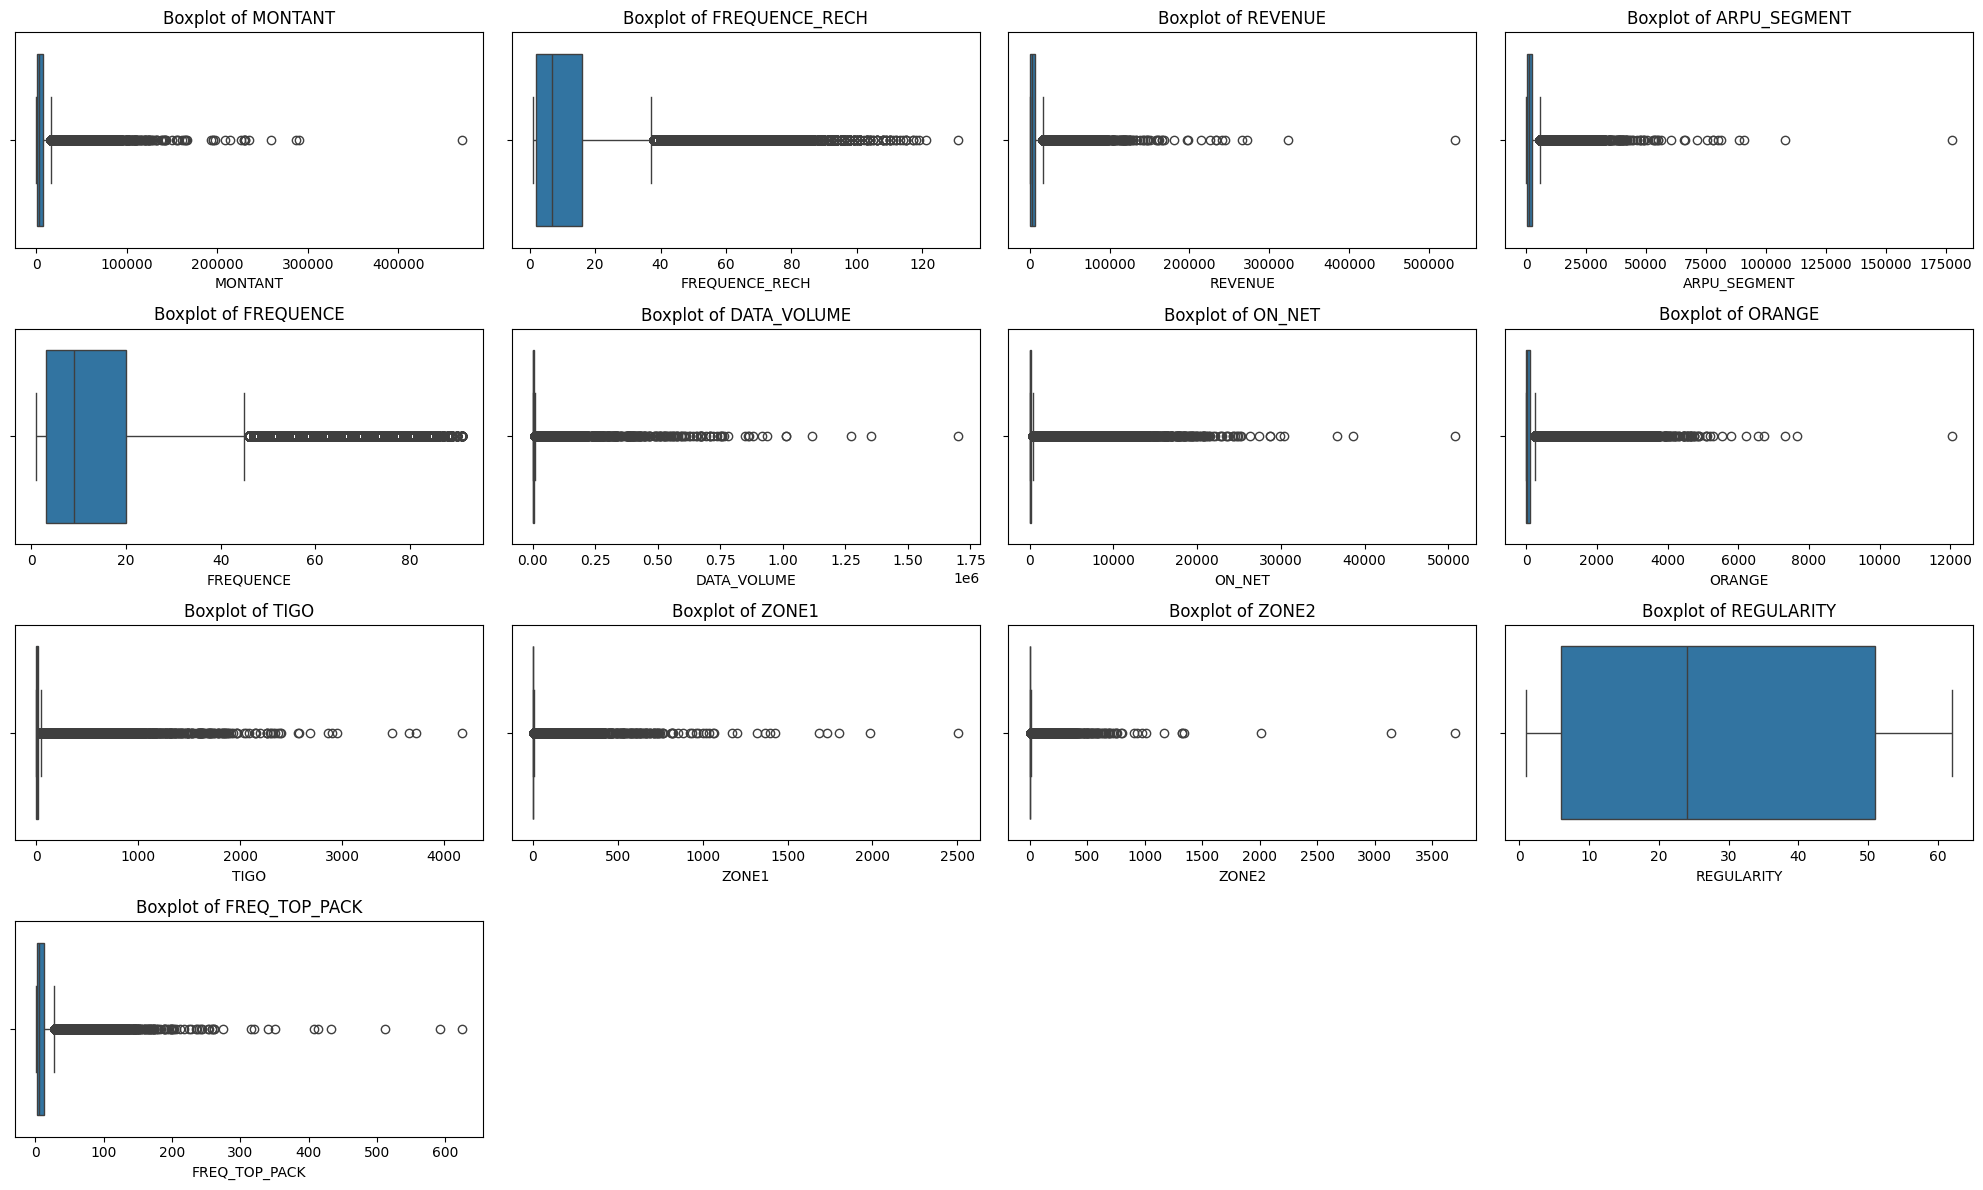

In [60]:
# Select numerical columns
num_cols = (
    df.drop('CHURN', axis=1)
            .select_dtypes(include=['float', 'number'])
            .columns
            )

fig, axes = plt.subplots(ncols=4, 
                         nrows=(len(num_cols) + 4 - 1) // 4,
                         figsize=(20, 4 * 3))
axes = axes.flatten() 

# Loop through each numerical column and create a histogram
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off') 

plt.tight_layout()
plt.show()

## **Notes**
- After plotting boxplots , it's evident that all columns have outliers

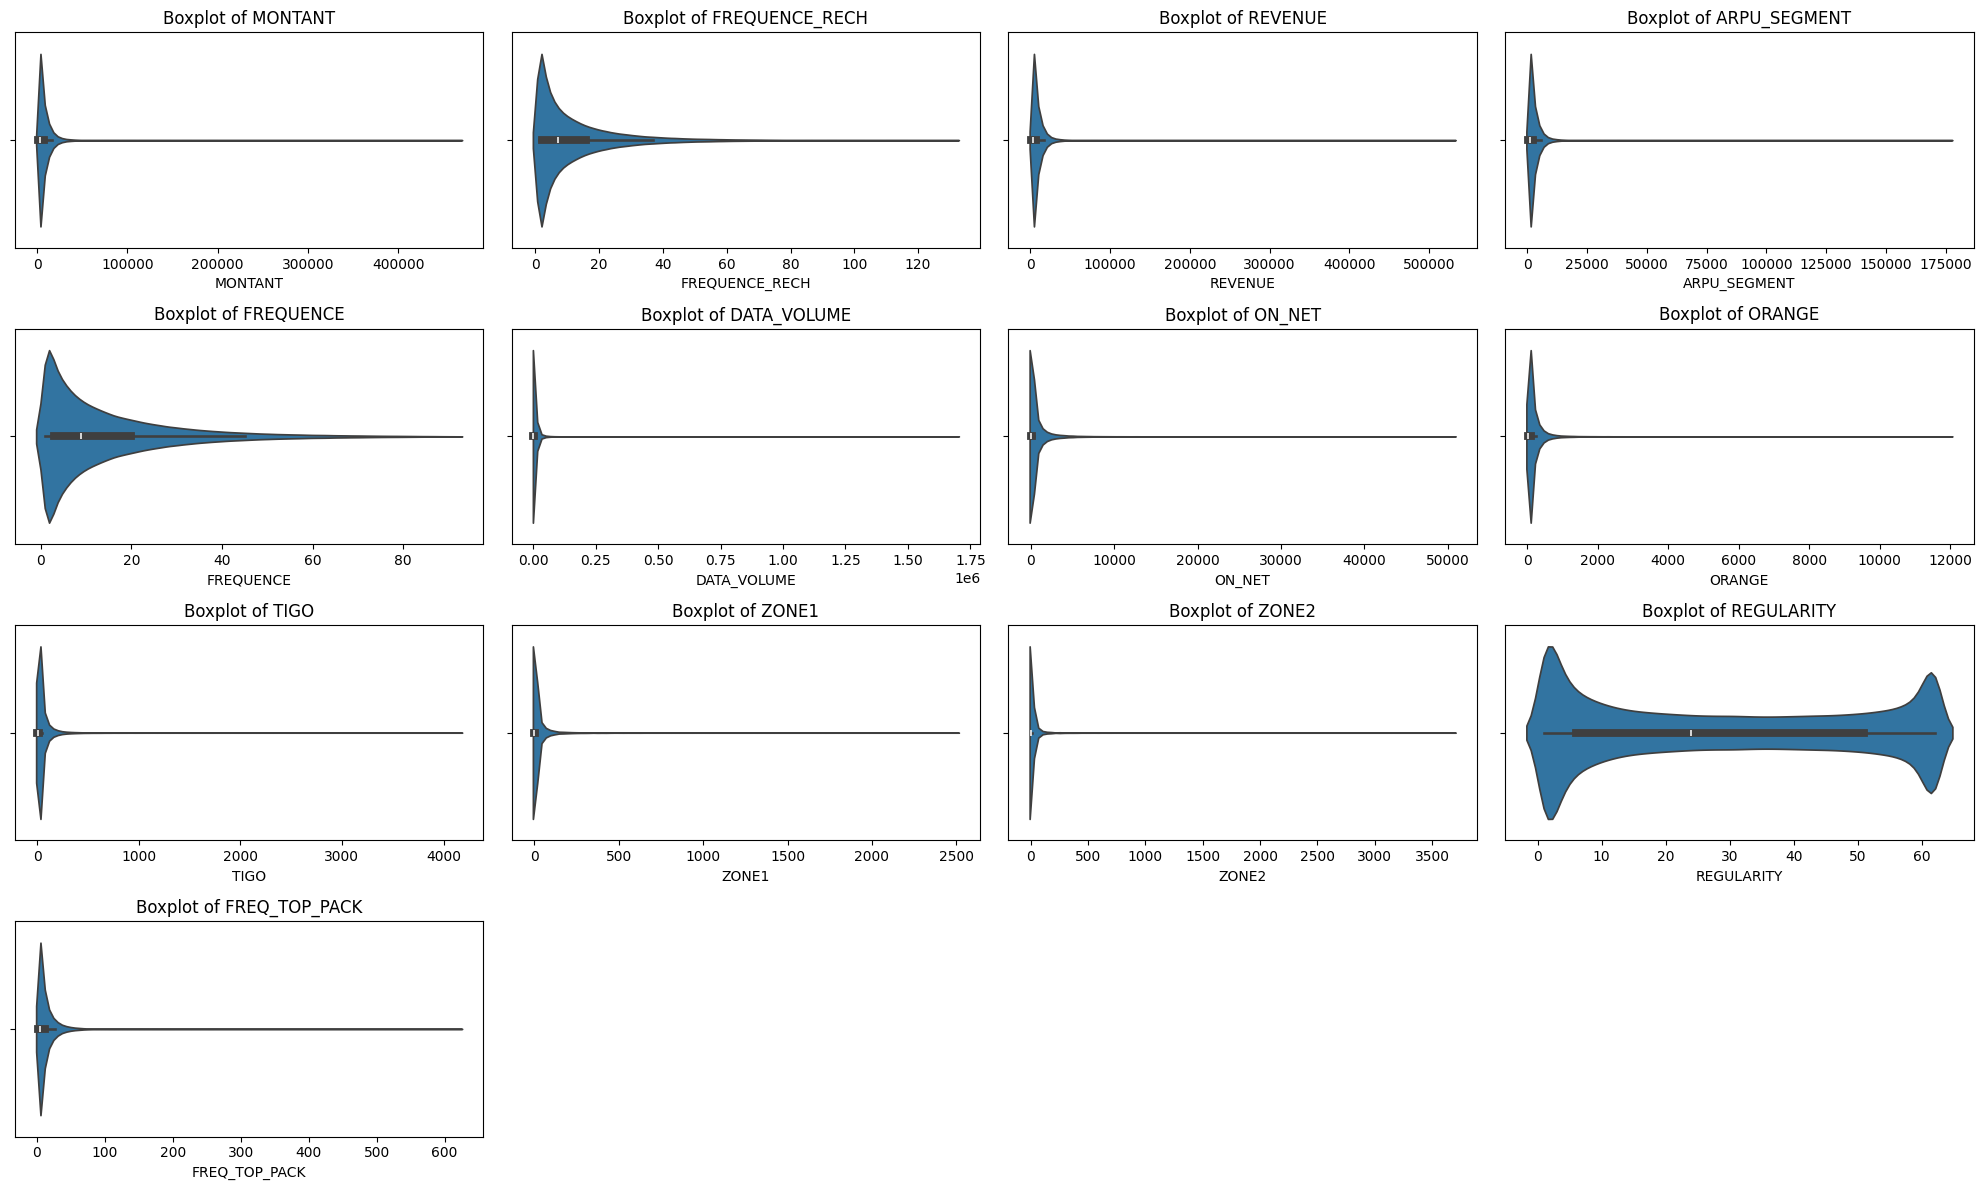

In [61]:
# Create subplots
fig, axes = plt.subplots(ncols=4, 
                         nrows=(len(num_cols) + 4 - 1) // 4,
                         figsize=(20, 4 * 3))
axes = axes.flatten() 

# Loop through each numerical column and create a histogram
for i, col in enumerate(num_cols):
    sns.violinplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining unused subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off') 

plt.tight_layout()
plt.show()

### **Notes**
- The data in all the columns is positively skewed, meaning most of the values are concentrated on the lower side of the distribution.
- There are several outliers that stretch the data towards higher values, which may distort the results in other visualizations like histograms, but the violin plot captures this effectively.

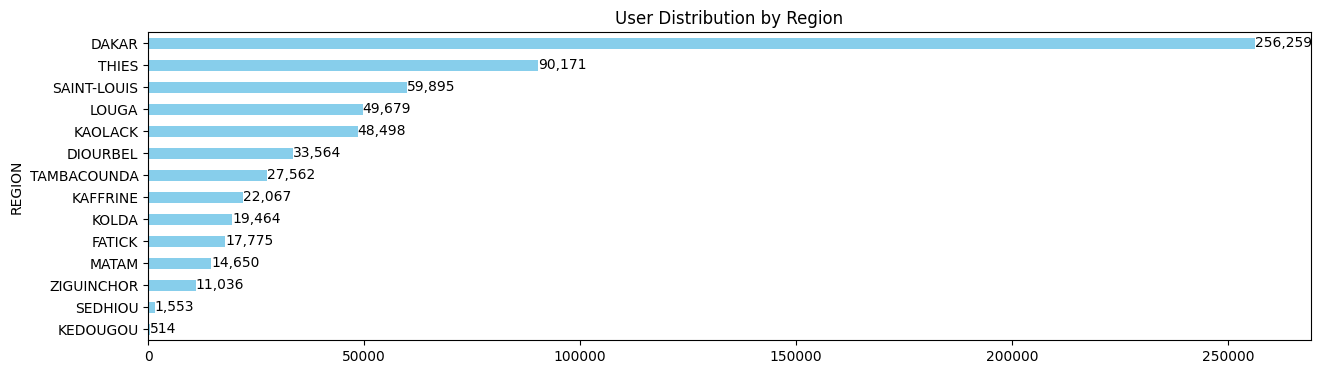

In [87]:
# Group users by region
user_by_region = df.groupby('REGION')['user_id'].count().sort_values(ascending=True)

# Plot a barplot
plt.figure(figsize=(15, 4))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Region')
plt.show()

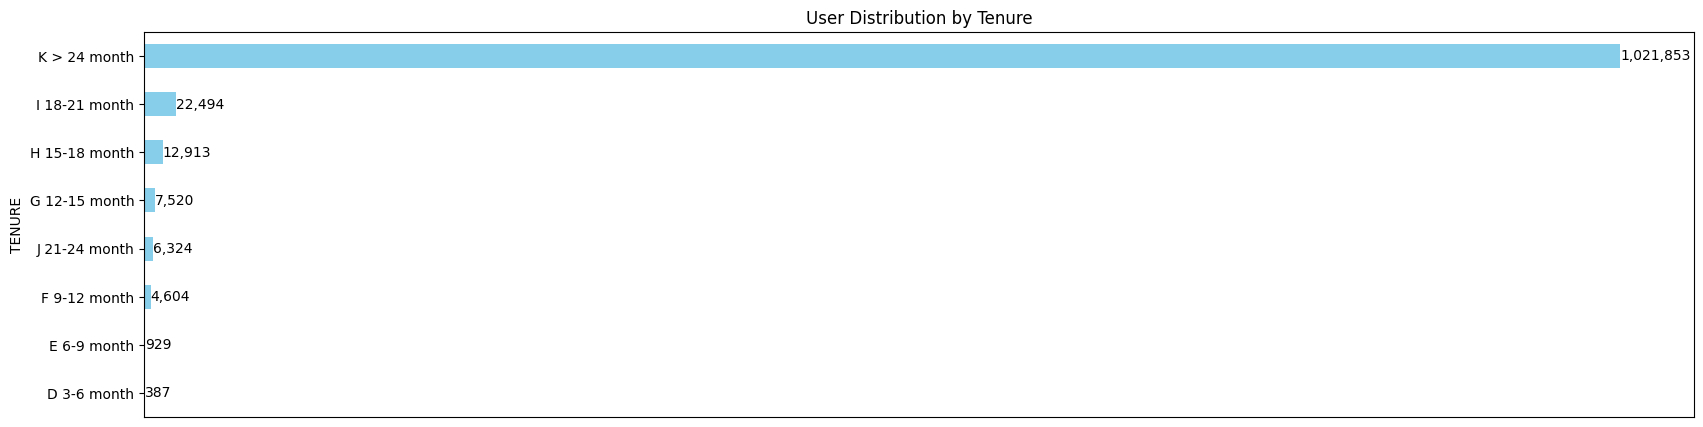

In [94]:
# Group users by tenure
user_by_region = df.groupby('TENURE')['user_id'].count().sort_values(ascending=True)

# Plot a barplot
plt.figure(figsize=(20, 5))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Tenure')
plt.xticks([])
plt.show()

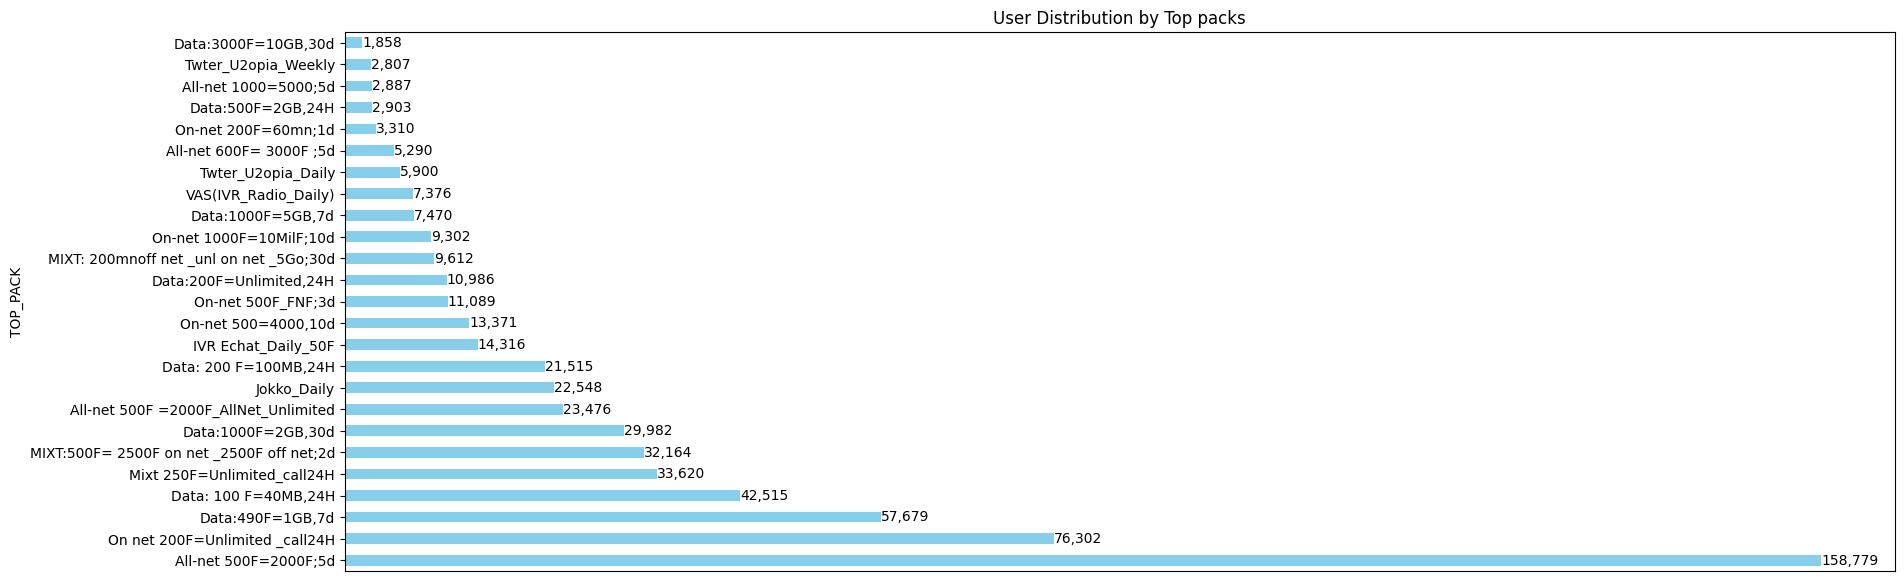

In [102]:
# Group users by top packs
user_by_region = (
    df.groupby('TOP_PACK')['user_id']
    .count()
    .sort_values(ascending=False)
    .nlargest(25)
    )

# Plot a barplot
plt.figure(figsize=(20, 7))
user_bar = user_by_region.plot(kind='barh', color='skyblue')

# Add data labels
for i, value in enumerate(user_by_region):
    user_bar.text(value, i, f'{value:,.0f}', va='center', ha='left')

plt.title('User Distribution by Top packs')
plt.xticks([])
plt.show()